In [1]:
from obspy import UTCDateTime, Stream
from obspy.clients.fdsn import Client
from obspy.core import AttribDict
import cartopy
import os

client = Client("IRIS")

starttime = UTCDateTime("2004-12-26 00:30:53")
endtime = UTCDateTime("2004-12-26 01:30:53")
cat = client.get_events(starttime=starttime, endtime=endtime,
                        maxlatitude=17.984, maxlongitude=132.5391,
                        minlatitude=-16.7993, minlongitude=80.1563)
print(cat)
events = cat.filter('magnitude > 8.5')

8 Event(s) in Catalog:
2004-12-26T01:30:14.220000Z |  +8.838,  +93.622 | 5.5 mb
2004-12-26T01:25:46.980000Z |  +5.463,  +94.282 | 6.1 mb
2004-12-26T01:22:23.690000Z |  +7.372,  +93.998 | 6.0 mb
2004-12-26T01:21:19.080000Z |  +6.326,  +93.394 | 6.1 mb
2004-12-26T01:18:46.070000Z |  +3.946,  +94.218 | 5.3 mb
2004-12-26T01:17:09.020000Z |  +4.919,  +94.510 | 5.5 mb
2004-12-26T01:06:10.870000Z |  +9.841,  +94.114 | 6.6 mb
2004-12-26T00:58:52.050000Z |  +3.413,  +95.901 | 9.0 MW


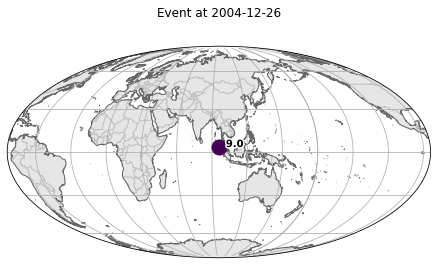

In [2]:
fig = events.plot('global', 'i', method='cartopy');
fig.savefig('sumatra.pdf')

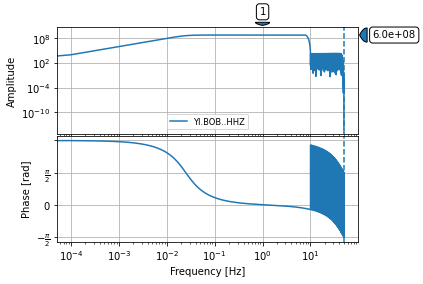

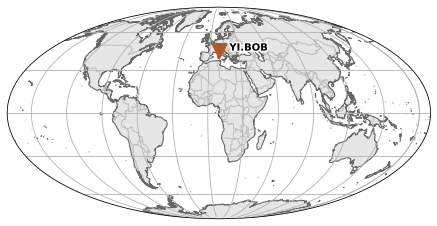

In [3]:
starttime = UTCDateTime("2004-12-26T00:58:52")
endtime = UTCDateTime("2004-12-26T01:30:52")
folder = 'tut2-inventories/'
if not os.path.exists(folder):
    os.makedirs(folder)
inv = client.get_stations(network="YI", station="BOB", channel="HHZ", level="response",
                         starttime=starttime, endtime=endtime)
inv.plot_response(min_freq=1E-4);
inv.plot('global', 'i', method='cartopy');
# save and plot reponse of inventory is important because you need to
# find the range of good frequency

# NOTE: 3 components of one station have the same response
inv.write(folder+'BOB'+'.xml',format='STATIONXML')

In [4]:
str = client.get_waveforms(network="YI", station="BOB", location="", channel="HHZ",
                         starttime=starttime, endtime=endtime, attach_response=True)

str_non = client.get_waveforms(network="YI", station="BOB", location="", channel="HHZ",
                         starttime=starttime, endtime=endtime)

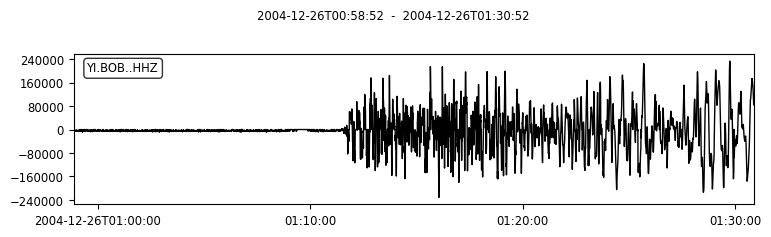

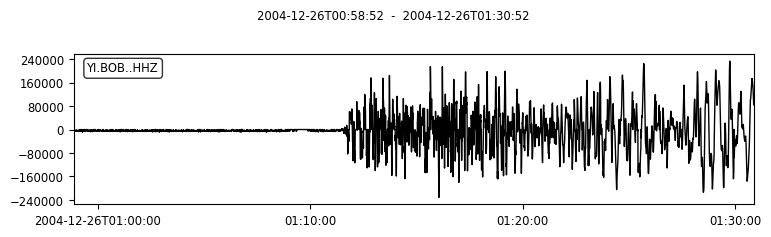

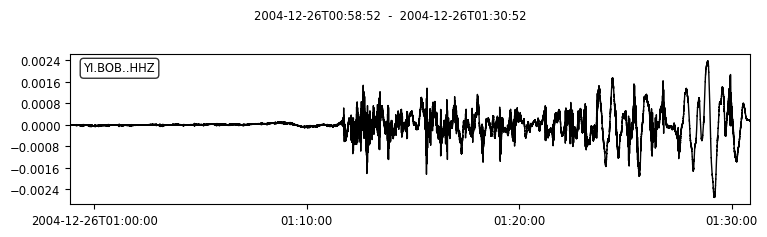

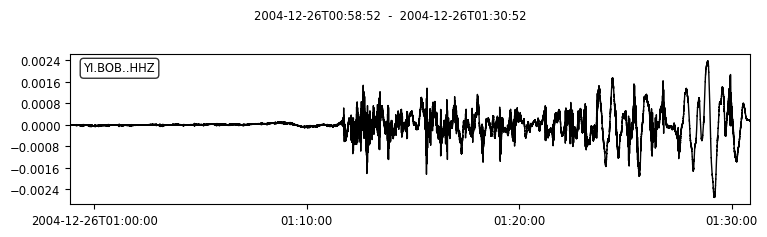

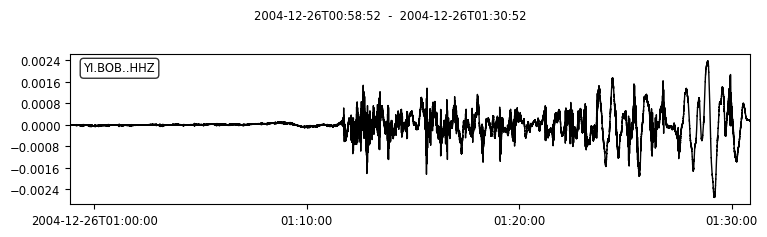

1 Trace(s) in Stream:
YI.BOB..HHZ | 2004-12-26T00:58:52.000000Z - 2004-12-26T01:30:52.000000Z | 100.0 Hz, 192001 samples

In [5]:
# You may do not need to inventory to remove reponse
# But you must need attach response in get waveforms
# You yon dont attach the remoe reponse of waveforms,
# You need the inventorystr.plot();
str.plot()
str_non.plot()

str_removereponse = str.copy()
str_removereponse.remove_response(output="DISP", water_level=60)
str_removereponse.plot();

str_removereponse = str_non.copy()
str_removereponse.remove_response(inventory=inv,output="DISP", water_level=60)
str_removereponse.plot();

str_removereponse_filter = str_removereponse.copy()
str_removereponse.filter("highpass", freq=1.0)
str_removereponse_filter.plot()

str_removereponse_filter_detrend = str_removereponse_filter.copy()
str_removereponse_filter_detrend.detrend('simple')
str_removereponse_filter_detrend.detrend('demean')

# resample...

In [6]:
str_removereponse_filter_detrend[0].stats
# add the gcarc/baz to data
attr = AttribDict()
attr.gcarc = 120
str_removereponse_filter_detrend[0].stats.mseed = attr
str_removereponse_filter_detrend[0].stats

               network: YI
               station: BOB
              location: 
               channel: HHZ
             starttime: 2004-12-26T00:58:52.000000Z
               endtime: 2004-12-26T01:30:52.000000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 192001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'gcarc': 120})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2004, 12, 26, 1, 30, 52)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2004, 12, 26, 0, 58, 52))', "ObsPy 1.2.2: remove_response(fig=None::inventory=<obspy.core.inventory.inventory.Inventory object at 0x7fa8d57d1640>::output='DISP'::plot=False::pre_filt=None::taper=True::taper_fraction=0.05::water_level=60::zero_mean=True)", "ObsPy 1.2.2: detrend(options={}::type='simple')", "ObsPy 1.2.2: detrend(options={}::type='demean'